##### 데이터 준비 

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-05-02 02:58:39--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-05-02 02:58:39--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-05-02 02:58:39--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

#### K-means

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [4]:
print(km.labels_)
print(len(km.labels_)) # 300 : labels_ 배열의 길이 = 샘플 개수

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
300


In [12]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [13]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1) :
  n = len(arr) # 샘플 개수
  # 한 줄에 10개씩 이미지 그림, 샘플 개수를 10으로 나누어 전체 행 개수 계산
  rows = int(np.ceil(n/10))
  # 행이 1개이면, 열의 개수 = 샘플 개수 / 그렇지 않으면, 열의 개수 = 10
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows) :
    for j in range(cols) :
      if i*10 + j < n :
        axs[i, j] = plt.imshow(arr[i*10 + j], cmap='gray_r')
  plt.show()

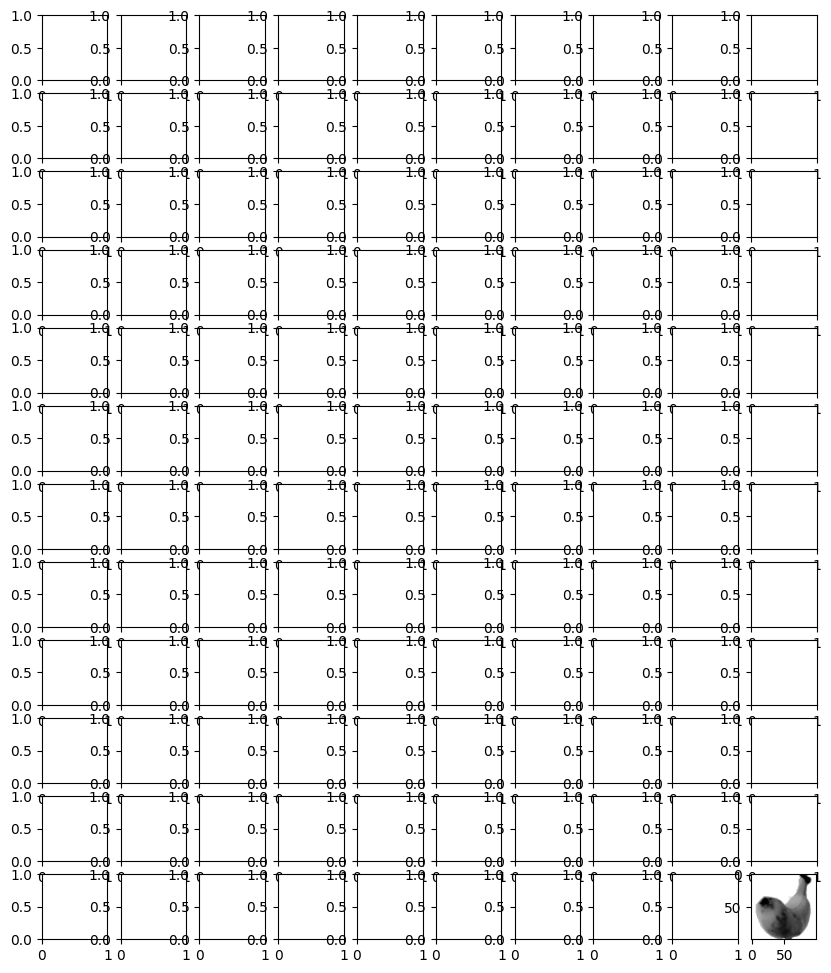

In [14]:
# 0에 속한 샘플들
draw_fruits(fruits[km.labels_==0])

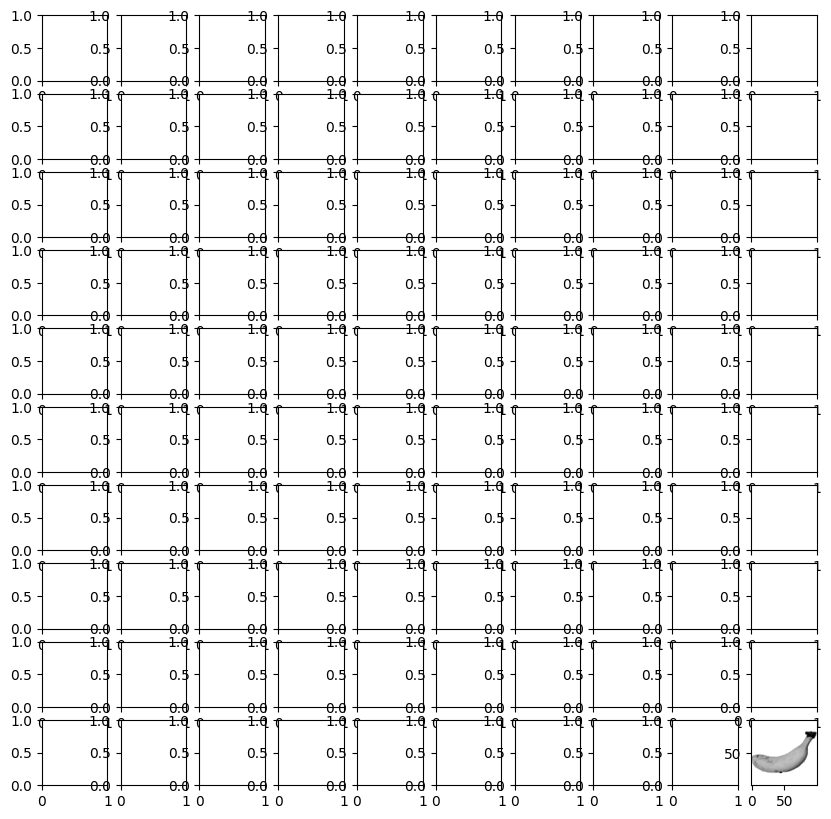

In [9]:
# 1에 속한 샘플들
draw_fruits(fruits[km.labels_==1])

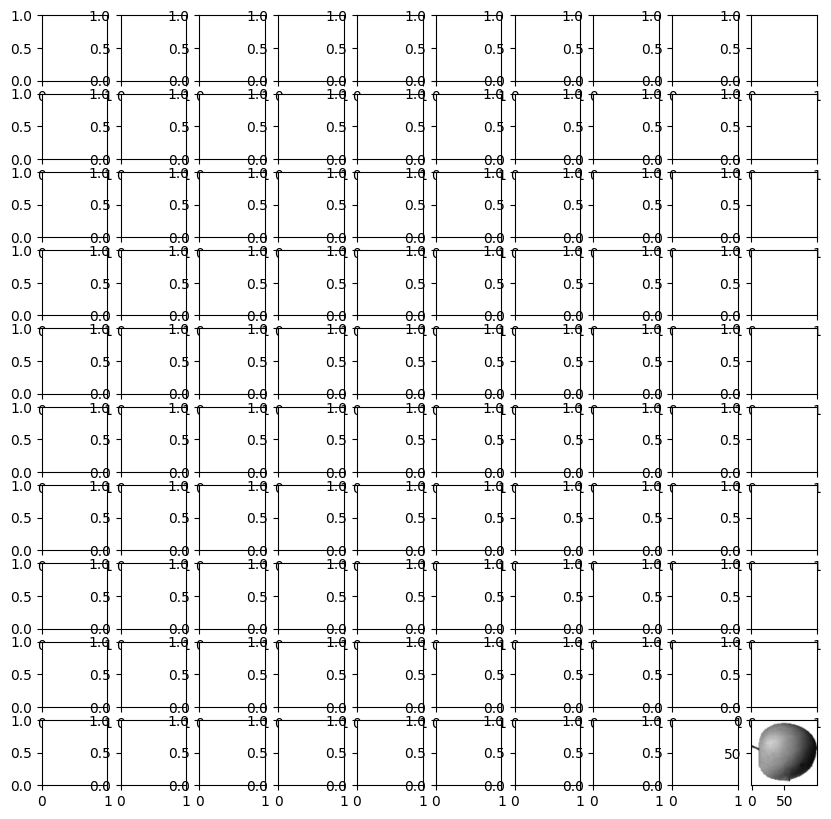

In [10]:
# 2에 속한 샘플들
draw_fruits(fruits[km.labels_==2])

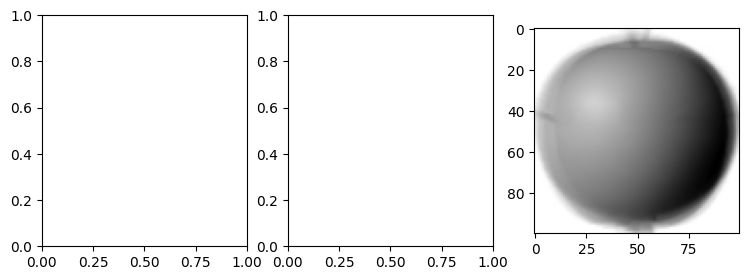

In [15]:
# 2차원 배열로 변경
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

레이블0 / 레이블1 / 레이블2

In [16]:
# 인덱스 100인 샘플에서 클러스터 중심까지 거리 
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [18]:
print(km.predict(fruits_2d[100:101]))

[0]


3393으로 거리가 가장 작은 레이블 0, 예측 클래스 또한 레이블 0

=> 인덱스 100인 샘플은 레이블 0인 첫번째 클러스터에 속해있다.

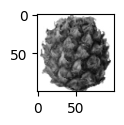

In [19]:
draw_fruits(fruits[100:101])

In [20]:
print(km.n_iter_)

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

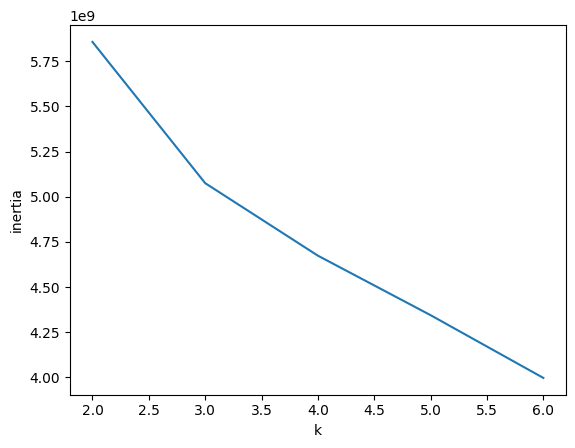

In [21]:
# 엘보우 - 이너셔
inertia = []  # 이너셔(거리 제곱 합)
for k in range(2, 7) :
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

k=3